## Временные ряды: проверка случайности ряда наблюдений и оценка тренда периодической составляющей

Количество пострадавших за 2013-2019г. (по месяцам)

In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import scipy as sc
import matplotlib.pyplot as plt
import statistics
import math

import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.ExcelFile('data_regression.xlsx')
data = data.parse('Лист1')
data = data.drop(['Количество пожаров, ед', 'Материальный ущерб, млн'], axis = 1)

In [23]:
data

,Дата,"Количество пострадавших, чел"
0,2013-01,2576
1,2013-02,2049
2,2013-03,2178
3,2013-04,1855
4,2013-05,1708
...,...,...
79,2019-08,1134
80,2019-09,1358
81,2019-10,1342
82,2019-11,1775


#### 2.	Построим график полученного ряда (ВР).

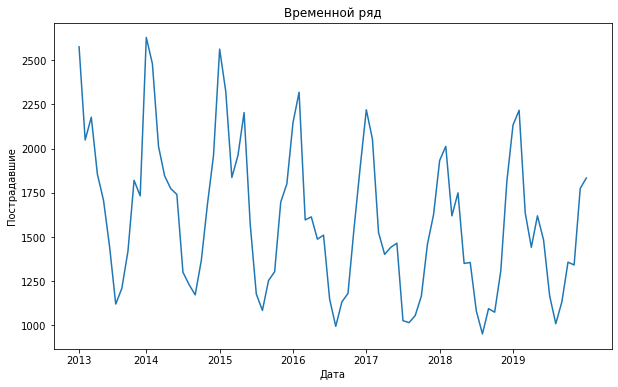

In [24]:
value = data['Количество пострадавших, чел']
position = data['Дата']

fig, ax = plt.subplots()

ax.plot(position, value)

ax.set_xticks([0, 11, 23, 35, 47, 59, 71])
ax.set_xticklabels(['2013', '2014', '2015', '2016', '2017', '2018', '2019'])

fig.set_figwidth(10)
fig.set_figheight(6)

ax.set_ylabel('Пострадавшие')
ax.set_xlabel('Дата')
ax.set_title('Временной ряд')

plt.show()

#### 3. Осуществим проверку на случайность полученного ряда.

##### Критерий серий, основанный на медиане выборки

In [25]:
data_sort = data.sort_values(by = ['Количество пострадавших, чел'])
mediana = statistics.median(data_sort['Количество пострадавших, чел'])
print('Медиана ранжированного ряда = ', mediana)

Медиана ранжированного ряда =  1563.0


In [26]:
data_copy = data.copy()
data_copy['d_i'] = data['Количество пострадавших, чел'].apply(lambda x: 1 if x > mediana else (0 if x == mediana else -1))
data_copy

,Дата,"Количество пострадавших, чел",d_i
0,2013-01,2576,1
1,2013-02,2049,1
2,2013-03,2178,1
3,2013-04,1855,1
4,2013-05,1708,1
...,...,...,...
79,2019-08,1134,-1
80,2019-09,1358,-1
81,2019-10,1342,-1
82,2019-11,1775,1


In [27]:
series = []
v = 0
t_max = 0
for i, elem in enumerate(data_copy['d_i']):
    if i == len(data_copy['d_i'])-1:
        v = v+1
        t_max+=1
        series.append(t_max)
        break
    elif data_copy['d_i'][i] == data_copy['d_i'][i+1]:
        t_max += 1
    else:
        v = v+1
        t_max+=1
        series.append(t_max)
        t_max = 0
t_max = max(series)
print('Максимальная длина серии: t_max = ', t_max, '\nКоличество серий: v = ',v)       

Максимальная длина серии: t_max =  9 
Количество серий: v =  17


Проверим гипотезу случайности (для 5% уровня значимости)

In [28]:
n = len(data_copy['d_i'])

v_cr = 1/2*(n+1 - 1.96 * pow(n-1, 0.5))
t_max_cr = 3.3 * math.log10(n+1)

if v > v_cr and t_max < t_max_cr:
    print(f'v = {v} > v_cr = {v_cr:.3f} \nt_max = {t_max} < t_max_cr = {t_max_cr:.3f}\nПринимается гипотеза о случайности ряда')
else: print(f'v = {v} < v_cr = {v_cr:.3f} \nt_max = {t_max} > t_max_cr = {t_max_cr:.3f}\nГипотеза о случайности ряда отклоняется')

v = 17 < v_cr = 33.572 
t_max = 9 > t_max_cr = 6.367
Гипотеза о случайности ряда отклоняется


##### Критерий “восходящих и нисходящих” серий

In [29]:
data_copy_2 = data.copy()
data_copy_2['d_i'] = 'Nan'
for i in range(n):
    if i == n-1:
        break
    if (data_copy_2['Количество пострадавших, чел'][i+1] - data_copy_2['Количество пострадавших, чел'][i])>0:
        data_copy_2.loc[i, 'd_i'] = 1
    elif (data_copy_2['Количество пострадавших, чел'][i+1] - data_copy_2['Количество пострадавших, чел'][i]) < 0:
        data_copy_2.loc[i,'d_i'] = -1
    else: data_copy_2.loc[i,'d_i'] = 0
data_copy_2

,Дата,"Количество пострадавших, чел",d_i
0,2013-01,2576,-1
1,2013-02,2049,1
2,2013-03,2178,-1
3,2013-04,1855,-1
4,2013-05,1708,-1
...,...,...,...
79,2019-08,1134,1
80,2019-09,1358,-1
81,2019-10,1342,1
82,2019-11,1775,1


In [30]:
series = []
v = 0
t_max = 0
for i in range(n):
    if i == n-1:
        break
    elif data_copy_2['d_i'][i] == data_copy_2['d_i'][i+1]:
        t_max += 1
    else:
        v = v+1
        t_max+=1
        series.append(t_max)
        t_max = 0
t_max = max(series)
print('Максимальная длина серии: t_max = ', t_max, '\nКоличество серий: v = ',v)

Максимальная длина серии: t_max =  8 
Количество серий: v =  36


In [31]:
# Проверка гипотезы на случайность

v_cr = 1/3*(2*n-1) - 1.96 * pow((16*n-29)/90, 0.5)
t_0 = 6 # так как 26 < n <= 153 (n = 84)

if v > v_cr and t_max < t_0:
    print(f'v = {v} > v_cr = {v_cr:.3f} \nt_max = {t_max} < t_0 = {t_0}\nПринимается гипотеза о случайности ряда')
else: print(f'v = {v} < v_cr = {v_cr:.3f} \nt_max = {t_max} > t_0 = {t_0}\nГипотеза о случайности ряда отклоняется')

v = 36 < v_cr = 48.175 
t_max = 8 > t_0 = 6
Гипотеза о случайности ряда отклоняется


#### 4.	Найдем оценку сезонной компоненты.

Выделение тренда производилось в Excel
Выделим сезонную компоненту

In [32]:
T = 12
n = 84
m = int(n/T)
print('m = ', m)

m =  7


In [33]:
df = pd.ExcelFile('application.xlsx')
df = df.parse('Лист4')

##### Полиномиальный тренд (4 степени)

Text(0, 0.5, 'Оценка периодической составляющей')

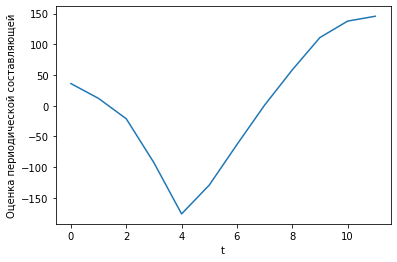

In [34]:
y = df['y']
f = df['Линия тренда']
S = []
for t in range(0, T):
    sum_val = 0
    for j in range(m):
        sum_val += y[t+j] -f[t+j]
    S.append(sum_val/m)
plt.plot(S)
plt.xlabel('t')
plt.ylabel('Оценка периодической составляющей')

Text(0.5, 1.0, 'Полиномиальный тренд')

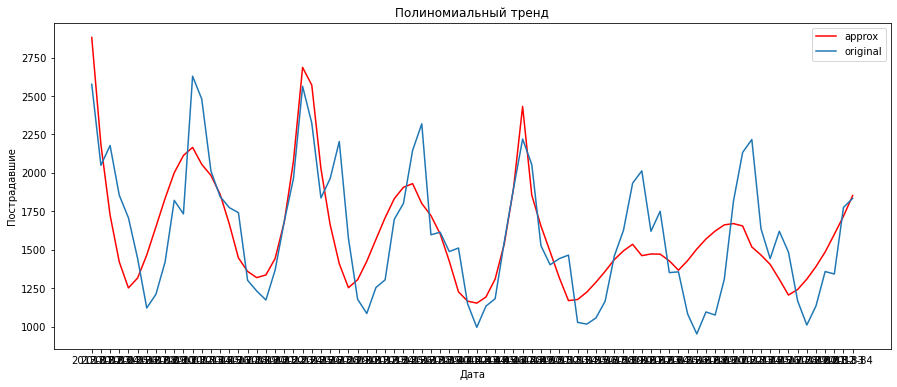

In [35]:
plt.figure(figsize = (15,6))
plt.plot(df['Дата'], S*m + f, color = 'red', label = 'approx')
plt.plot(df['Дата'], df['y'], label = 'original')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Пострадавшие')
plt.title('Полиномиальный тренд')

##### Линейный тренд (Уравнение парной линейной регресси)

Text(0, 0.5, 'Оценка периодической составляющей')

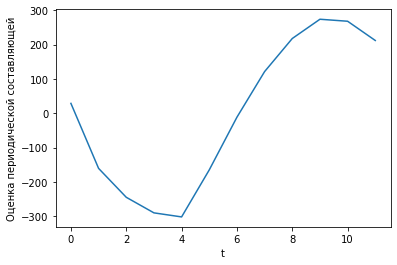

In [36]:
df_2 = pd.ExcelFile('application.xlsx')
df_2 = df_2.parse('Лист1')

y = df_2['y']
f_lin = df_2['Лин. тренд']
S_lin = []
for t in range(0, T):
    sum_val = 0
    for j in range(m):
        sum_val += y[t+j] -f_lin[t+j]
    S_lin.append(sum_val/m)
plt.plot(S_lin)
plt.xlabel('t')
plt.ylabel('Оценка периодической составляющей')

Text(0.5, 1.0, 'Линейный тренд')

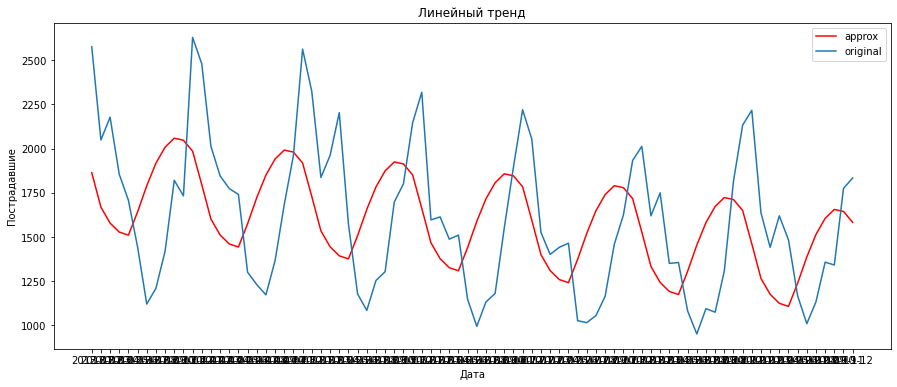

In [37]:
plt.figure(figsize = (15,6))
plt.plot(df_2['Дата'], S_lin*m + f_lin, color = 'red', label = 'approx')
plt.plot(df_2['Дата'], df_2['y'], label = 'original')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Пострадавшие')
plt.title('Линейный тренд')

#### 5.	Вычислим остатки и построим их графики. Исследуем остатки на случайность. 

##### Остатки полиномиального тренда

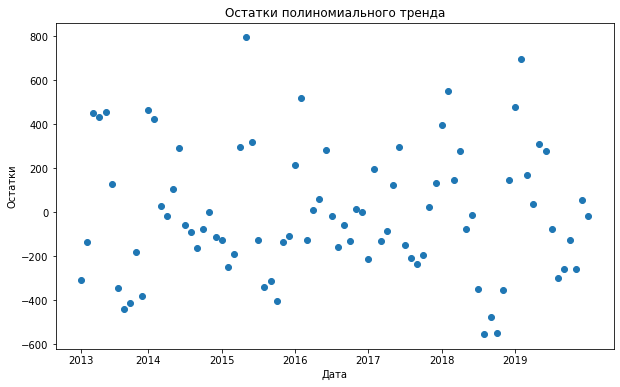

In [38]:
y_pred = S*m + f
E = y - y_pred

value = E
position = data['Дата']

fig, ax = plt.subplots()

ax.scatter(position, value)

ax.set_xticks([0, 11, 23, 35, 47, 59, 71])
ax.set_xticklabels(['2013', '2014', '2015', '2016', '2017', '2018', '2019'])

fig.set_figwidth(10)
fig.set_figheight(6)

ax.set_ylabel('Остатки')
ax.set_xlabel('Дата')
ax.set_title('Остатки полиномиального тренда')
plt.show()

In [39]:
# Проверим на случайность

# Критерий, основанный на медиане

d = {'E': E, 'd_i': [0]*84}
dff = pd.DataFrame(data=d)

data_sort = dff.sort_values(by = ['E'])
mediana = statistics.median(data_sort['E'])
print('Медиана ранжированного ряда = ', mediana)


dff_copy = dff.copy()
dff_copy['d_i'] = dff['E'].apply(lambda x: 1 if x > mediana else (0 if x == mediana else -1))
dff_copy

series = []
v = 0
t_max = 0
for i in range(n):
    if i == n-1:
        v = v+1
        t_max+=1
        series.append(t_max)
        break
    elif dff_copy['d_i'][i] == dff_copy['d_i'][i+1]:
        t_max += 1
    else:
        v = v+1
        t_max+=1
        series.append(t_max)
        t_max = 0
t_max = max(series)
print('Максимальная длина серии: t_max = ', t_max, '\nКоличество серий: v = ',v) 

v_cr = 1/2*(n+1 - 1.96 * pow(n-1, 0.5))
t_max_cr = 3.3 * math.log10(n+1)

if v > v_cr and t_max < t_max_cr:
    print(f'v = {v} > v_cr = {v_cr:.3f} \nt_max = {t_max} < t_max_cr = {t_max_cr:.3f}\nПринимается гипотеза о случайности ряда')
else: print(f'v = {v} < v_cr = {v_cr:.3f} \nt_max = {t_max} > t_max_cr = {t_max_cr:.3f}\nГипотеза о случайности ряда отклоняется')

Медиана ранжированного ряда =  -58.37627661844192
Максимальная длина серии: t_max =  7 
Количество серий: v =  26
v = 26 < v_cr = 33.572 
t_max = 7 > t_max_cr = 6.367
Гипотеза о случайности ряда отклоняется


In [40]:
# Кр. восходящих и нисходящих серий

dff_copy_2 = dff.copy()
dff_copy_2['d_i'] = 'Nan'

for i in range(n):
    if i == n-1:
        break
    if (dff_copy_2['E'][i+1] - dff_copy_2['E'][i])>0:
        dff_copy_2.loc[i, 'd_i'] = 1
    elif (dff_copy_2['E'][i+1] - dff_copy_2['E'][i]) < 0:
        dff_copy_2.loc[i,'d_i'] = -1
    else: dff_copy_2.loc[i,'d_i'] = 0

series = []
v = 0
t_max = 0
for i in range(n):
    if i == n-1:
        break
    elif dff_copy_2['d_i'][i] == dff_copy_2['d_i'][i+1]:
        t_max += 1
    else:
        v = v+1
        t_max+=1
        series.append(t_max)
        t_max = 0
t_max = max(series)
print('Максимальная длина серии: t_max = ', t_max, '\nКоличество серий: v = ',v)

v_cr = 1/3*(2*n-1) - 1.96 * pow((16*n-29)/90, 0.5)
t_0 = 6 # так как 26 < n <= 153 (n = 84)

if v > v_cr and t_max < t_0:
    print(f'v = {v} > v_cr = {v_cr:.3f} \nt_max = {t_max} < t_0 = {t_0}\nПринимается гипотеза о случайности ряда')
else: print(f'v = {v} < v_cr = {v_cr:.3f} \nt_max = {t_max} < t_0 = {t_0}\nГипотеза о случайности ряда отклоняется')

Максимальная длина серии: t_max =  5 
Количество серий: v =  44
v = 44 < v_cr = 48.175 
t_max = 5 < t_0 = 6
Гипотеза о случайности ряда отклоняется


##### Остатки линейного тренда

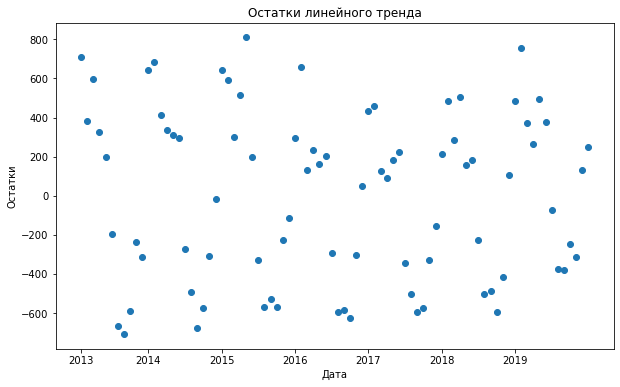

In [41]:
y_pred_lin = S_lin*m + f_lin
E_lin = y - y_pred_lin

value = E_lin
position = data['Дата']

fig, ax = plt.subplots()

ax.scatter(position, value)

ax.set_xticks([0, 11, 23, 35, 47, 59, 71])
ax.set_xticklabels(['2013', '2014', '2015', '2016', '2017', '2018', '2019'])

fig.set_figwidth(10)
fig.set_figheight(6)

ax.set_ylabel('Остатки')
ax.set_xlabel('Дата')
ax.set_title('Остатки линейного тренда')

plt.show()

In [42]:
# Проверка на случайность

# Критерий, основанный на медиане

d = {'E_lin': E_lin, 'd_i': [0]*84}
dff = pd.DataFrame(data=d)

data_sort = dff.sort_values(by = ['E_lin'])
mediana = statistics.median(data_sort['E_lin'])
print('Медиана ранжированного ряда = ', mediana)


dff_copy = dff.copy()
dff_copy['d_i'] = dff['E_lin'].apply(lambda x: 1 if x > mediana else (0 if x == mediana else -1))
dff_copy

series = []
v = 0
t_max = 0
for i in range(n):
    if i == n-1:
        v = v+1
        t_max+=1
        series.append(t_max)
        break
    elif dff_copy['d_i'][i] == dff_copy['d_i'][i+1]:
        t_max += 1
    else:
        v = v+1
        t_max+=1
        series.append(t_max)
        t_max = 0
t_max = max(series)
print('Максимальная длина серии: t_max = ', t_max, '\nКоличество серий: v = ',v) 

v_cr = 1/2*(n+1 - 1.96 * pow(n-1, 0.5))
t_max_cr = 3.3 * math.log10(n+1)

if v > v_cr and t_max < t_max_cr:
    print(f'v = {v} > v_cr = {v_cr:.3f} \nt_max = {t_max} < t_max_cr = {t_max_cr:.3f}\nПринимается гипотеза о случайности ряда')
else: print(f'v = {v} < v_cr = {v_cr:.3f} \nt_max = {t_max} < t_max_cr = {t_max_cr:.3f}\nГипотеза о случайности ряда отклоняется')

Медиана ранжированного ряда =  114.8297
Максимальная длина серии: t_max =  6 
Количество серий: v =  17
v = 17 < v_cr = 33.572 
t_max = 6 < t_max_cr = 6.367
Гипотеза о случайности ряда отклоняется


In [43]:
# Кр. восходящих и нисходящих серий

dff_copy_2 = dff.copy()
dff_copy_2['d_i'] = 'Nan'

for i in range(n):
    if i == n-1:
        break
    if (dff_copy_2['E_lin'][i+1] - dff_copy_2['E_lin'][i])>0:
        dff_copy_2.loc[i, 'd_i'] = 1
    elif (dff_copy_2['E_lin'][i+1] - dff_copy_2['E_lin'][i]) < 0:
        dff_copy_2.loc[i,'d_i'] = -1
    else: dff_copy_2.loc[i,'d_i'] = 0

series = []
v = 0
t_max = 0
for i in range(n):
    if i == n-1:
        break
    elif dff_copy_2['d_i'][i] == dff_copy_2['d_i'][i+1]:
        t_max += 1
    else:
        v = v+1
        t_max+=1
        series.append(t_max)
        t_max = 0
t_max = max(series)
print('Максимальная длина серии: t_max = ', t_max, '\nКоличество серий: v = ',v)

v_cr = 1/3*(2*n-1) - 1.96 * pow((16*n-29)/90, 0.5)
t_0 = 6 # так как 26 < n <= 153 (n = 84)

if v > v_cr and t_max < t_0:
    print(f'v = {v} > v_cr = {v_cr:.3f} \nt_max = {t_max} < t_0 = {t_0}\nПринимается гипотеза о случайности ряда')
else: print(f'v = {v} < v_cr = {v_cr:.3f} \nt_max = {t_max} > t_0 = {t_0}\nГипотеза о случайности ряда отклоняется')

Максимальная длина серии: t_max =  7 
Количество серий: v =  40
v = 40 < v_cr = 48.175 
t_max = 7 > t_0 = 6
Гипотеза о случайности ряда отклоняется


#### 6.	Построим прогноз исследуемого показателя y для моментов времени t = 31; 34; 37; 41.

y(31): Прогнозное значение = 1567.3725443661601, реальное значение = 1254
y(34): Прогнозное значение = 1906.1153351491548, реальное значение = 1801
y(37): Прогнозное значение = 1722.0281701289257, реальное значение = 1597
y(41): Прогнозное значение = 1165.311756113242, реальное значение = 1148


Text(0.5, 1.0, 'Полиномиальный тренд')

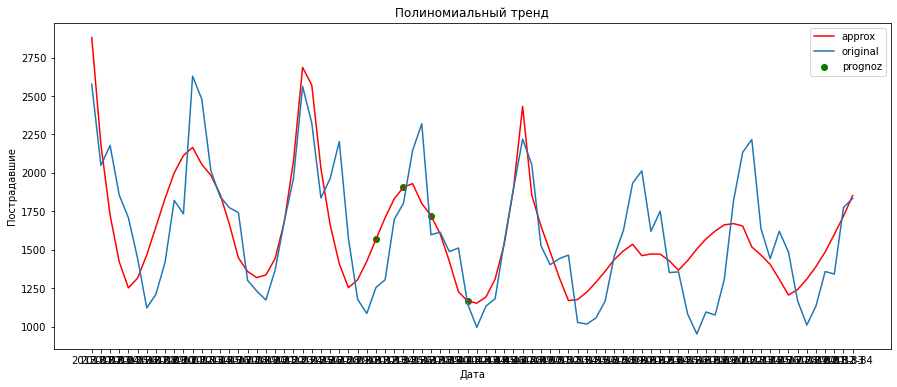

In [44]:
t = [31, 34, 37, 41]
for i in range(4):
    print(f'y({t[i]}): Прогнозное значение = {y_pred[t[i]]}, реальное значение = {y[t[i]]}')
          
plt.figure(figsize = (15,6))
plt.plot(df['Дата'], S*m + f, color = 'red', label = 'approx')
plt.plot(df['Дата'], df['y'], label = 'original')
plt.scatter(t, y_pred[t], color = 'green', label = 'prognoz')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Пострадавшие')
plt.title('Полиномиальный тренд')

y(31): Прогнозное значение = 1783.368442857143, реальное значение = 1254
y(34): Прогнозное значение = 1913.3684428571428, реальное значение = 1801
y(37): Прогнозное значение = 1467.5177571428571, реальное значение = 1597
y(41): Прогнозное значение = 1440.8034714285714, реальное значение = 1148


Text(0.5, 1.0, 'Линейный тренд')

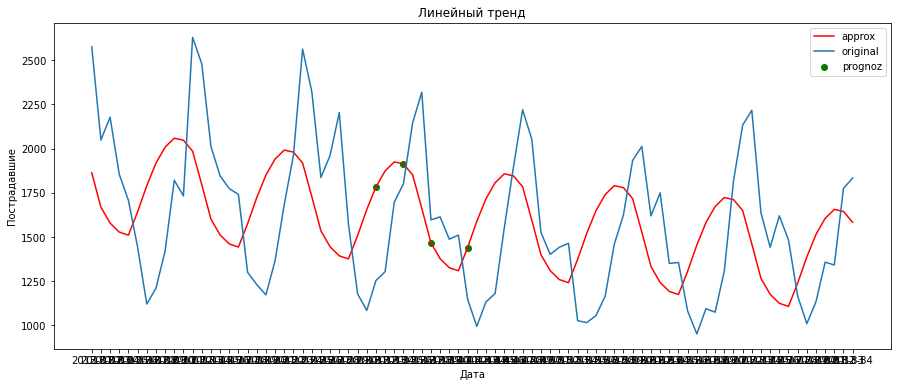

In [45]:
for i in range(4):
    print(f'y({t[i]}): Прогнозное значение = {y_pred_lin[t[i]]}, реальное значение = {y[t[i]]}')
       
plt.figure(figsize = (15,6))
plt.plot(df['Дата'], y_pred_lin, color = 'red', label = 'approx')
plt.plot(df['Дата'], df['y'], label = 'original')
plt.scatter(t, y_pred_lin[t], color = 'green', label = 'prognoz')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Пострадавшие')
plt.title('Линейный тренд')

#### 7. Смоделируем двумерную выборку (xi, yi,), состоящую из 48 наблюдений

По формуле:
y_i= α + β*x_i + u_i

u_i= ε_i-ρ*ε_i, i= (1,48)

где α и β – коэффициенты из парной линейной регрессии, ρ – параметр, выбираемый произвольно в пределах 0,8 <= ρ < 1,5; ε_i, i = (1,48) –выборка из нормального распределения N(0,σ^2).

In [46]:
import scipy.stats as sts
mu = 0
sig = 1

norm = sts.norm(loc = mu, scale = sig)
eps = norm.rvs(size = 48)

In [47]:
a = 783.71 
b = 0.32
rho = 0.98

#посчитаем u
u = [eps[i] - rho*eps[i-1] for i in range(48)]

# Подставим в уi:
X = np.arange(1,49)
y = a + b*X + u
y

array([785.64678814, 782.86797534, 787.18669323, 782.12215591,
       787.4157143 , 783.57052075, 786.75389522, 787.43603655,
       785.10168165, 788.75225023, 785.09389865, 790.03617452,
       786.18713435, 786.33315251, 790.3997288 , 789.55585204,
       788.04994078, 791.10320892, 785.8876727 , 792.9802341 ,
       790.18740328, 792.08121472, 788.52908644, 792.06877567,
       791.86229373, 789.59507427, 794.78792132, 792.76785341,
       792.75043485, 793.14928586, 794.10791723, 794.30987084,
       794.6332608 , 793.96288248, 794.988487  , 794.28514784,
       795.59194611, 797.02522629, 795.92950849, 796.69800442,
       795.5835221 , 799.61700595, 795.8476533 , 797.87038616,
       796.97104724, 801.00469848, 798.33305886, 797.55945913])

#### 8. Построим диаграмму рассеяния.

Text(0.5, 1.0, 'Диаграмма рассеяния')

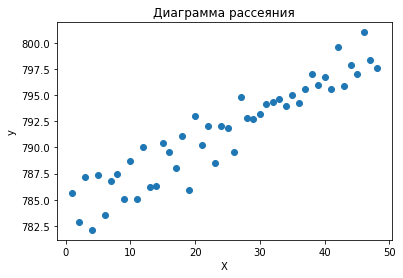

In [48]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Диаграмма рассеяния')

#### 9. Построим соответствующую парную линейную регрессию и вычислим остатки.

In [49]:
from sklearn.linear_model import LinearRegression

X = X[:, np.newaxis]
model = LinearRegression()
model_fit = model.fit(X, y)

y_pred = model_fit.predict(X)

print(f'Уравнение ПЛР: {model_fit.intercept_} + {model_fit.coef_[0]} * t')

Уравнение ПЛР: 783.7931976951048 + 0.31675650137159467 * t


Text(0, 0.5, 'Остатки')

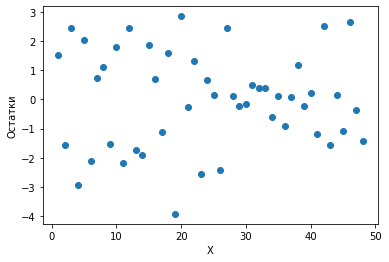

In [50]:
E = y - y_pred

plt.scatter(X, E)
plt.xlabel('Х')
plt.ylabel("Остатки")

Text(0, 0.5, 'y')

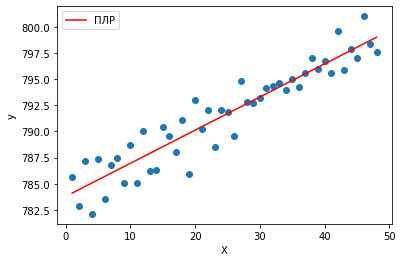

In [51]:
plt.scatter(X, y)
plt.plot(X, y_pred, color = 'red', label = 'ПЛР')
plt.legend()
plt.xlabel('Х')
plt.ylabel("y")

#### 10. Вычислим статистику Дарбина-Уотсона и сделаем вывод о наличии или отсутствии значимой автокорреляции в остатках, воспользовавшись таблицей критических значений распределения Дарбина-Уотсона. 

In [52]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(E)
print(dw)

3.2844363674518546


In [53]:
# d > 2 – необходимо сравнивать значение d-статистики с критическими значениями dL и dU (табличные). Если 4 − d < dL, H0 отвергается

dw_1 = 4 - dw
print('4 - d = ', dw_1)

n = 48

d_L = 1.5
d_U = 1.58

if dw_1 < d_L:
    print('H0 отвергается -> отсутствие значимой автокорреляции в остатках') #
else: 
    print('Нет оснований отклонить нулевую гипотезу')

4 - d =  0.7155636325481454
H0 отвергается -> отсутствие значимой автокорреляции в остатках


#### 11. Вычислим коэффициент автокорреляции первого порядка и сравним его со значением критерия Дарбина-Уотсона.

In [54]:
acorr =  pd.Series(E).autocorr(1)
print('Коэффициент автокорреляции первого порядка: ', acorr)

Коэффициент автокорреляции первого порядка:  -0.6708667143665734


In [55]:
2*(1-acorr) 

3.341733428733147

In [56]:
print(dw,'~', 2*(1-acorr))

3.2844363674518546 ~ 3.341733428733147
